# Chapter 5 - Mechanisms of Phenotypic Memory
Presented here is the code used to generate the results of Chapter 5.

## Prerequisites

In [1]:
from copy import copy
from copy import deepcopy
import glob
import math
from random import random
import sys

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.axes_grid1 import Grid
import numpy as np
import seaborn as sns

import seaborn as sbn
sbn.set(rc={'image.cmap': 'cubehelix'})
sbn.set_style("white")

import hedges

print "Python version: ", sys.version
print "numpy version: ", np.__version__
print "matplotlib version: ", matplotlib.__version__

#Plotting style variables
linestyles = ['-', '--', '-.',':']
linecols = [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["denim blue"],
            sns.xkcd_rgb["medium green"],sns.xkcd_rgb["black"]]

%matplotlib inline

Python version:  2.7.13 |Continuum Analytics, Inc.| (default, Dec 20 2016, 23:05:08) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
numpy version:  1.11.3
matplotlib version:  2.0.2


## Intracellular Memory
The exploration of the intracellular dynamics is presented in memintracellular.py. Specifically, this module implements the equations outlined in Section 5.2.1 and provides code to generate the associated figures. Example use is as follows:

In [2]:
import memintracellular as mmi
sigma = 6.77*10**(-7)
t = 60*60*24 #1day
#Sampling the numer of molcules remaining at time t, n(t), from n_0=60 with 
# decay rate sigma
#Note this is stochastic, these two can differ.
print "Molecules remaining (sample 1): ", mmi.sample(t, sigma, 60)
print "Molecules remaining (sample 2): ", mmi.sample(t, sigma, 60)

#Finding the expected number of molecules remaining
print "Expected remaining: ", mmi.expectation(t, sigma, 60) #Equation 5.11

#Finding the probability of n=50 molecules remaining
print "P(50 remaining | n0 = 60) = ", mmi.p(50,t,sigma,60) #Equation 5.10

Molecules remaining (sample 1):  57
Molecules remaining (sample 2):  58
Expected remaining:  56.5911018784
P(50 remaining | n0 = 60) =  0.00141843568099


We also implement functions that calculate the likelihood of an individual having an offspring of phenotype $A$ given a specified $n_0$, time of reproduction $t$, decay rate $\sigma$, and genetic burst values $x_b, y_b$ (for each molecular switch):

In [3]:
t_rep = 60*60*24*5 #5days
xb, yb = 30, 30
print "P(A|n0=60, sigma, DC , t_rep, xb, yb) = ", mmi.probDC(t, 60, sigma, xb, yb)
print "P(A|n0=60, sigma, DCx, t_rep, xb, yb) = ", mmi.probDCx(t, 60, sigma, xb, yb)
print "P(A|n0=60, sigma, DCy, t_rep, xb, yb) = ", mmi.probDCy(t, 60, sigma, xb, yb)
print "P(A|n0=60, sigma, AM , t_rep, xb, yb) = ", mmi.probAM(t, 60, sigma, xb, yb)

P(A|n0=60, sigma, DC , t_rep, xb, yb) =  0.742629113301
P(A|n0=60, sigma, DCx, t_rep, xb, yb) =  0.999750734437
P(A|n0=60, sigma, DCy, t_rep, xb, yb) =  0.0572942682524
P(A|n0=60, sigma, AM , t_rep, xb, yb) =  0.99999994845


Finally, the code in memintracellular.py can be used to generate the figures in the these as follows

/Users/dannichol/miniconda2/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


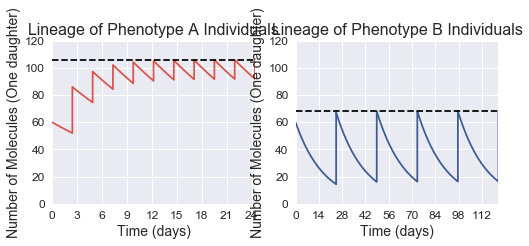

In [4]:
# mmi.comparing_decay() #Figure 5.3
# mmi.molsprobtimeplot() #Figure 5.2(A)
# mmi.exp_over_time() #Figure 5.2(B)
plt.figure(figsize=(8,3)); 
mmi.exp_reproduction_plot(sigma, 30,30,2.44*60*60*24, 24.4*60*60*24) #Figure 5.4

## Modelling Bet-Hedging with Epigenetic Memory
The code in memmodel.py contains the implementation of the model outlined in Section 5.2.2.

In [5]:
import memmodel as mem

In [6]:
#######################################################
# Parameters - Section 5.3
#######################################################
sigma = 6.77 * 10**(-7) #Equation 5.14
# Birth Rates (per second)
b_A = 4.74*10**(-6) 
b_B = 4.74*10**(-7)
# Death Rates (per second)
d_A = 1.39*10**(-6) 
d_B = 1.39*10**(-7)
#Death Rates, drug (per second)
d_A_drug = 5.56*10**(-6) * 2.
d_B_drug = d_B

In [7]:
#Building the population dynamics matrix
M = mem.get_memory_M(sigma, d_A, d_B, b_A, b_B, xb, yb, 
                     hedge = hedges.DC_hedge, fix_p=-1, fix_q=-1)

#######################################################
# Constructs a matrix model for 1hr of population growth
# using the above method. This is P^(60*60) as in Eqn 5.33
#
# The memory stratgies are denoted by integers according
# to:
#
#   0 - Strong Genetic
#   1 - Epigenetic Memory
#   2 - Contrained Memory
#######################################################
M1 = mem.get_one_hour_matrices(sigma, xb, hedges.DC_hedge, 1)

As discussed in Section 5.6.2, a drug treatment strategy is a length 14 binary vector

In [8]:
#Example
strat = [1,0]*7 #iota=7

A growth rate for this strategy can be determined as follows

In [9]:
M_no_drug = mem.get_memory_M(sigma, d_A, d_B, b_A, b_B, xb, 
                             60-xb, hedges.DC_hedge)**(60*60*24) #1 day no drug
M_drug = mem.get_memory_M(sigma, d_A_drug, d_B_drug, b_A, b_B, xb,
                          60-xb, hedges.DC_hedge)**(60*60*24) #1 day drug

print "Growth rate: ", \
        mem.get_strat_growthrate(strat, M_drug, M_no_drug, interval_len=1), \
        'doublings per week'

Growth rate:  0.594258122699 doublings per week


Figures 5.7 and 5.10 can be generated as follows. Note, this will take around 10minutes (on a 2012 MacBookPro).

!
!
!
!


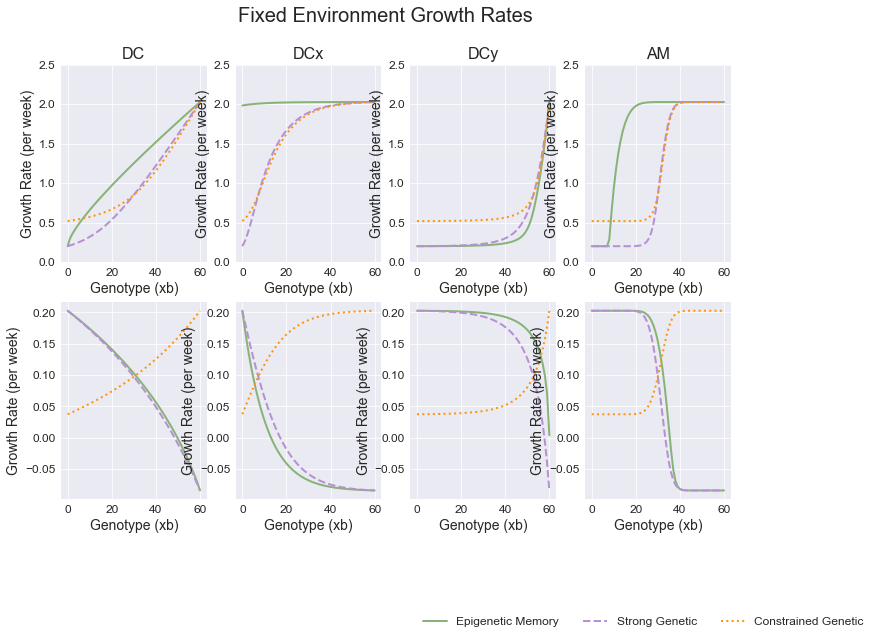

In [10]:
mem.fixed_e_plot() #5.7
# mem.generate_cyclic_plot_data(hedges.DC_hedge, 'DC') #5.10 data
# mem.make_cycling_plot() #5.10

## Exhaustive Exploration of All Metronomic Therapies
Section 5.6 - Implications for Therapy explores the space of all metronomic therapies comprising 14 'units' of length $\iota=1,7$ which can be designated as either drug or not drug. The code used to perform thiss exhaustive search is implemented in metronomic.py.

In [11]:
import metronomic as met

To exhaustively evaluate all fo the metronomic therapies, for all doses, all hedges, all three memory types and both genotypes (50% and 99% memory-free), call the following methods. Note that this exhaustive search is extremely slow (between 24 and 48 hours). For this reason, the methods in metronomic.py are comment out and should be uncommented to run.

In [12]:
met.generate_all_therapy_data(interval_len = 1, num_intervals = 14)
met.generate_all_therapy_data(interval_len = 7, num_intervals = 14)

Warning, takes a LONG time. Uncomment to run...
Warning, takes a LONG time. Uncomment to run...


From the exhausive search, we can produce the figures in Section 5.6 as follows

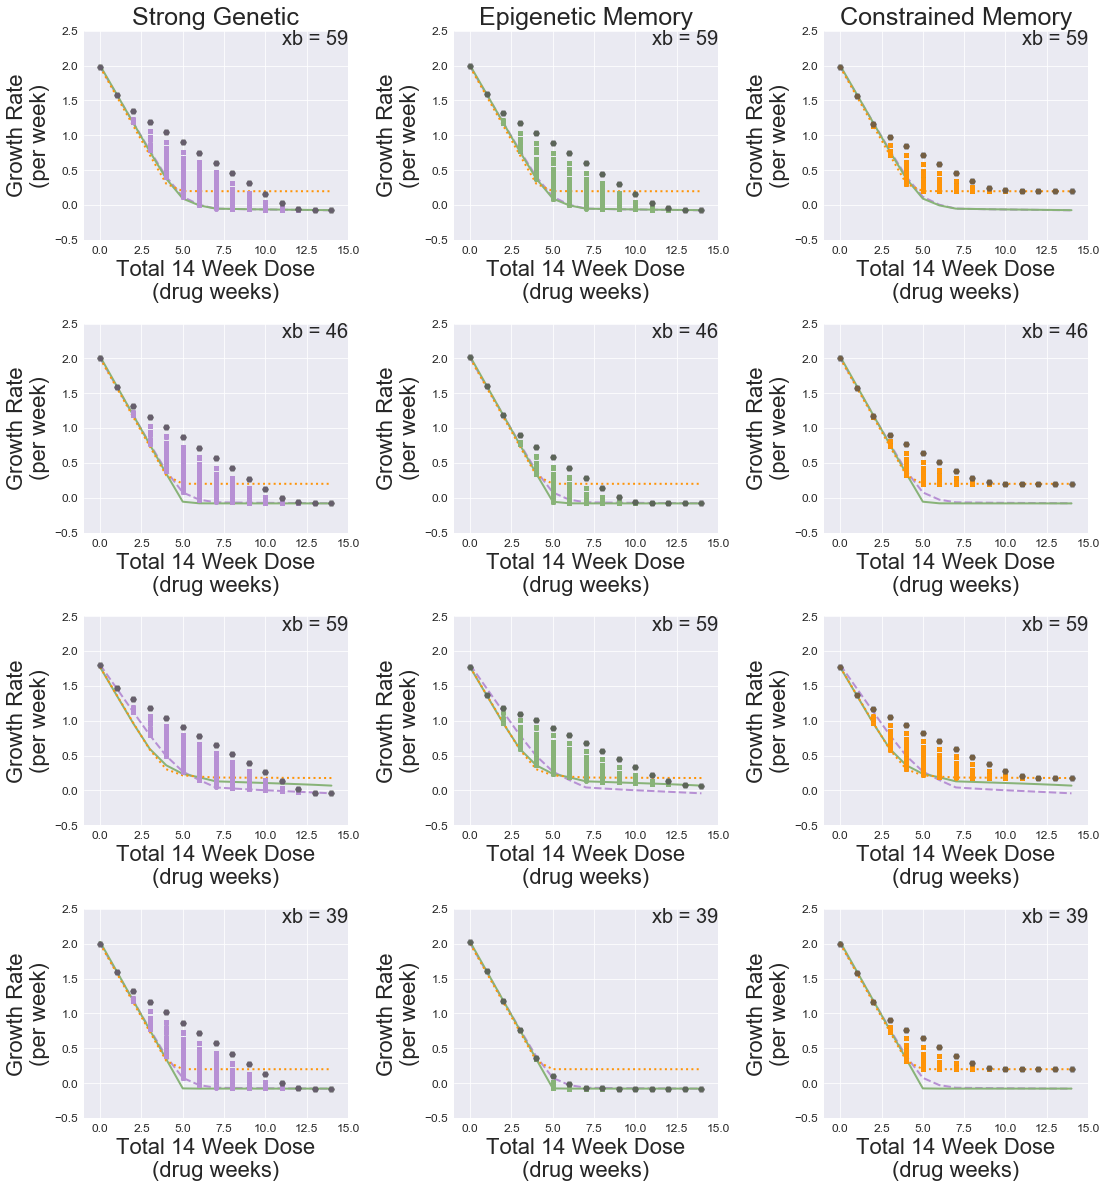

In [14]:
met.make_therapy_plot(interval_len=7)

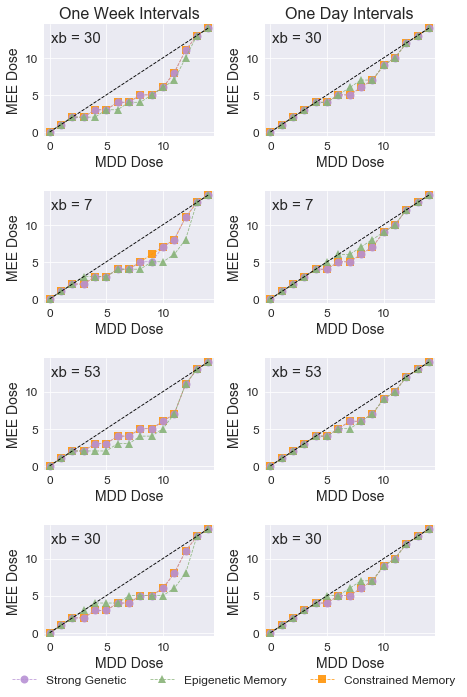

In [15]:
met.mdd_opt_comparison(0)

## Varying $\sigma$

The results of Section 5.7 which explore how varying $\sigma$ alters the efficacy of metronomic therapies are produced in varyingsigma.py. 

In [16]:
import varyingsigma as vrs

Figures 5.19 and 5.20 are produced as follows:

 1 For each $\sigma$, the full space of metronomic therapies is explored and the best therapy is recorded
 
 2 The $\sigma$-$rho$ curves are then built and saved
 
 3 The curves are plotted
   
   
The following code performs this task. Note that this will take a number of hours on a personal computer. 

By changing dose, gs_num and intervel_len, it is possible to explore the evolution in scenarios not presented in the thesis.

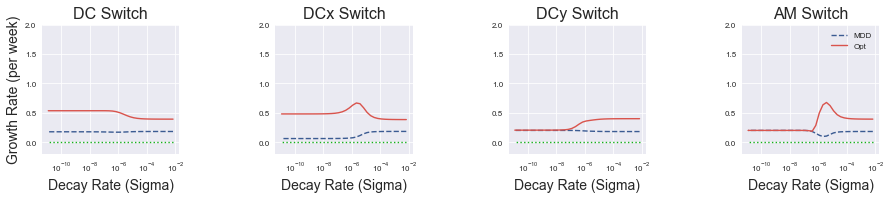

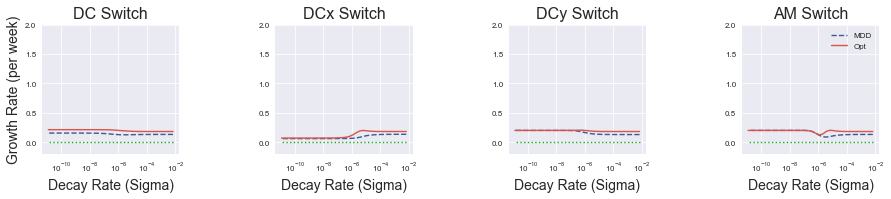

In [17]:
gs_num = 0 #Set the genotype set to 30,30,7,53 (approx. 50/50)
dose = 7 #The dose to consider

# The following four lines are slow.
# vrs.generate_all_sv(interval_len=1)
# vrs.generate_all_sv(interval_len=7)

# vrs.sigma_rho_analysis(0,7, interval_len=7)
# vrs.sigma_rho_analysis(0,11, interval_len=7)

#Plot the fig (examples)
vrs.plot_sig_curves(gs_num, dose=7)
vrs.plot_sig_curves(gs_num, dose=11)

## Adaptive Therapy
adaptivetherapy.py contains the code used to produce the results in Section 5.7.1 that explores the relationship between dose skipping, maximum-dose and optimal metronomic therapy.

Figures 5.21 and 5.22 can be produced as follows. plot_adaptive_curves generates the mdd and dose skipping curvea on the fly. The dose-restricted optimal curve is loaded from the data saved above (metronomic therapy). As such, the adaptive therapy figure cannot be made until after the metronomic therapy figures.

In [18]:
import adaptivetherapy as apt

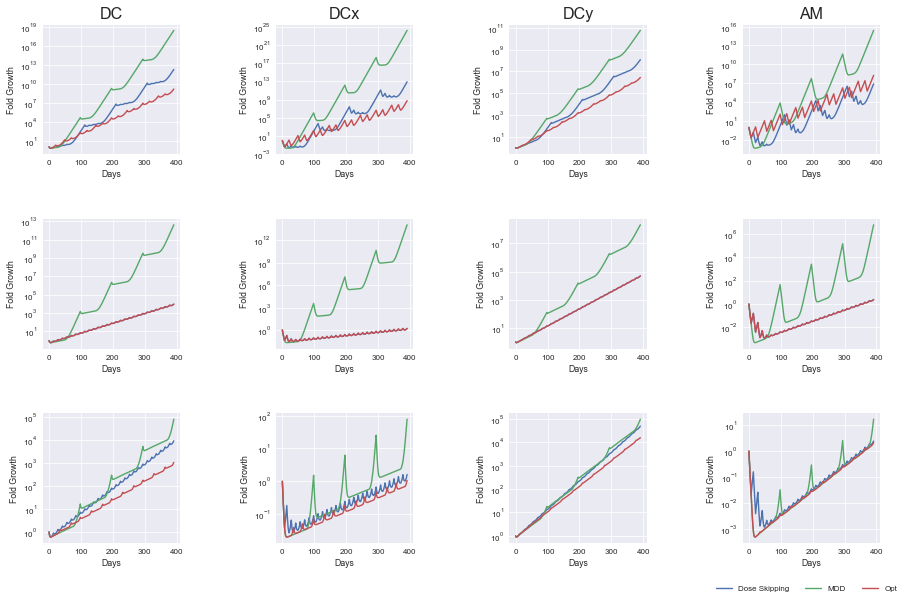

In [19]:
apt.plot_adaptive_curves(hedges.DC_hedge, 'DC', 0, 1, 7, 4, hrs_to_change = 7*24)